# Encoder-LSTM-Decoder Predicter Many2One Predicter
This script predicts 1 bar on input of 7 bars loaded from a MIDI file

In [2]:
import torch
from VAE.VAE_Train import VAE
from LSTM.VAE_LSTM_Many2One import LSTM_Many2One
from loadModel import loadStateDict
from lstm_utils.predict import predict

lstm_path = ''
vae_path = '../utils/pretrained_models/vae_lstm_model.pth'
bars=8
temperature=0.7

#for gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#load models
lstm_model = LSTM_Many2One(batch_size=1, seq_length=bars, 
             input_size=100, hidden_size=512)
vae_model = VAE()

#load weights
lstm_model = loadStateDict(lstm_model, lstm_path)
vae_model = loadStateDict(vae_model, vae_path)

# to device
lstm_model = lstm_model.double().to(device)
vae_model = vae_model.to(device)


--------GPU state dict restored, loaded into CPU--------


--------GPU data parallel state dict restored--------



INPUT


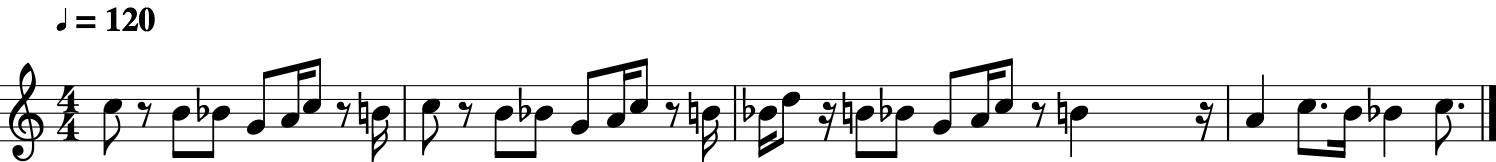

PREDICTION


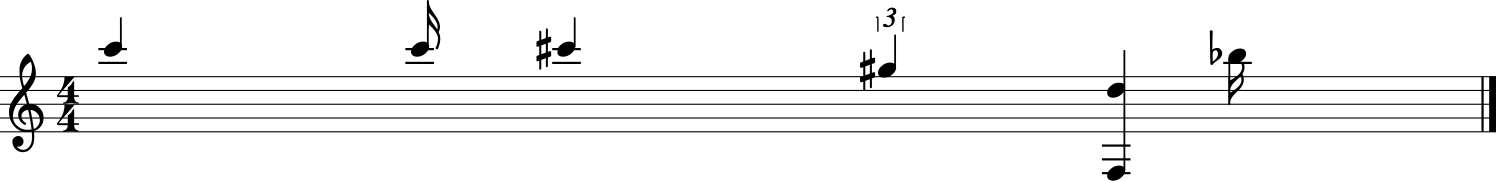

In [4]:
predict('../utils/midi_files/lstm_example.mid', 
                lstm_model, vae_model, temperature=0.7, play_bar=0)